# Showing the image

['cats']
[[[ 51  40  42]
  [ 50  39  41]
  [ 49  38  40]
  ...
  [166 178 180]
  [166 178 180]
  [162 169 172]]

 [[ 59  48  50]
  [ 56  48  49]
  [ 60  49  51]
  ...
  [171 180 183]
  [171 180 183]
  [171 178 181]]

 [[ 65  57  58]
  [ 55  49  50]
  [ 52  44  45]
  ...
  [149 157 157]
  [150 158 158]
  [160 168 168]]

 ...

 [[132 113 116]
  [146 127 130]
  [136 117 120]
  ...
  [  9   4   5]
  [ 30  28  28]
  [ 88  88  88]]

 [[ 86  66  71]
  [129 110 113]
  [114  95  98]
  ...
  [162 160 160]
  [157 155 155]
  [ 74  74  74]]

 [[136 115 123]
  [127 107 112]
  [112  94  95]
  ...
  [163 163 163]
  [164 164 164]
  [147 147 147]]]
(225, 225, 3)


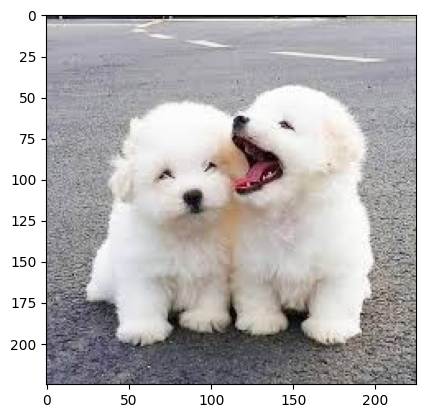

In [5]:
import numpy as np
np.set_printoptions(linewidth=np.inf)
import cv2
import imghdr
from matplotlib import pyplot as plt
data_location = "./drive/MyDrive/colab/"
import os
print(os.listdir(data_location))
img = cv2.imread(os.path.join(data_location, "data-1/image10.jpeg"))
print(img)
print(img.shape)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Cleaning data from unexpected extensions

In [9]:
image_extensions = ["jpeg", "jpg", "bmp", "png"]

for image_class in os.listdir(data_location):
  for image in os.listdir(os.path.join(data_location, image_class)):
    image_path = os.path.join(data_location, image_class, image)
    try:
      image_extension = imghdr.what(image_path)
      if image_extension not in image_extensions:
        print(f"Image not in the extension list {image_path}")
        os.remove(image_path)
    except Exception as e:
      print(f"Issue with the image {image_path}")

# Convert files to a dataset

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

data_location = "./drive/MyDrive/colab"
data = tf.keras.utils.image_dataset_from_directory(data_location)

Found 80 files belonging to 1 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

# Data Normalization

In [20]:
# if you are reading this(hello! :]) and wondering where the hell is my
# tuple_data_index and batch code
# i am also clueless, for whatever reason it gave me an error
# that batch is undefined(which is pretty weird)

# so instead i used this method as you suggested that we could use this
# as a good alternative
data = data.map(lambda x,y: (x/255, y))

In [21]:
data_scaled_iterator = data.as_numpy_iterator()

Batch scaled min: 0.0
Batch scaled max: 0.003921568859368563


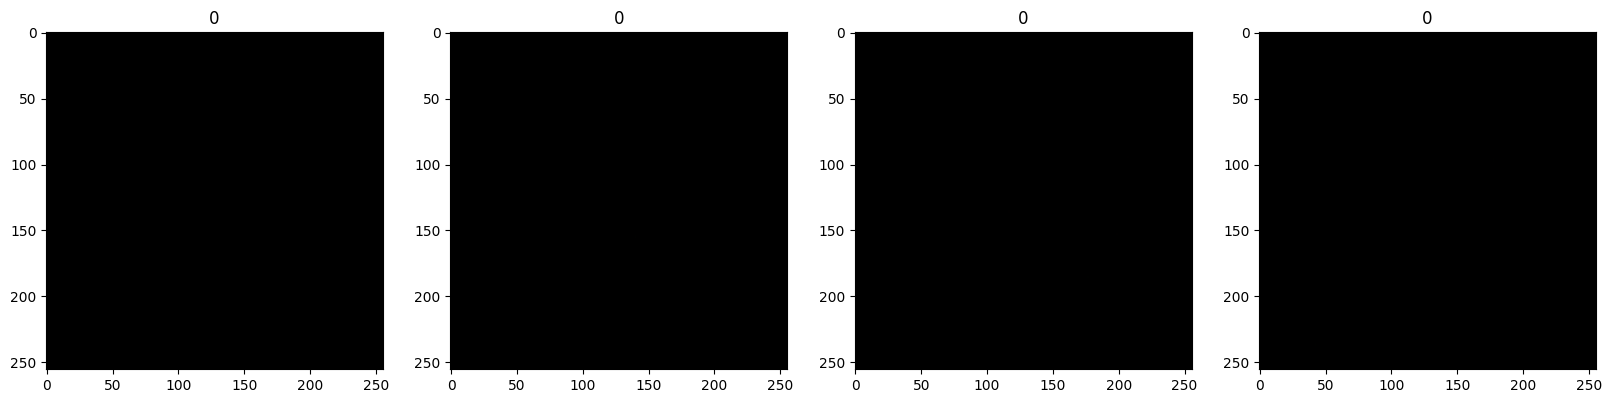

In [22]:
tuple_data_index = 0
tuple_label_index = 1
scaled_batch = data_scaled_iterator.next()
print(f"Batch scaled min: {scaled_batch[tuple_data_index].min()}")
print(f"Batch scaled max: {scaled_batch[tuple_data_index].max()}")
column_count = 4
fig, ax = plt.subplots(ncols = column_count, figsize=(20,20))
for idx, img in enumerate(scaled_batch[tuple_data_index][:column_count]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(scaled_batch[tuple_label_index][idx])

In [23]:
print(f"full data length(batch): {len(data)}")

full data length(batch): 3


# Splitting data (train, val, test)


In [24]:
train_size = round(len(data)*0.7)
val_size = round(len(data)*0.2)
test_size = round(len(data)*0.1)
print(f"train_size: {train_size}")
print(f"val_size: {val_size}")
print(f"text_size: {test_size}")


train_size: 2
val_size: 1
text_size: 0


In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
print(len(train))
print(len(val))
print(len(test))

2
1
0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [28]:
log_location = "./drive/MyDrive/colab/logs/cnn_training_logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_location)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 9s 4s/step - loss: 0.6809 - accuracy: 0.7188 - val_loss: 0.5859 - val_accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 5s 2s/step - loss: 0.5135 - accuracy: 1.0000 - val_loss: 0.2500 - val_accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 7s 4s/step - loss: 0.1715 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 5s 3s/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 2.1741e-04 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 5s 3s/step - loss: 1.1778e-04 - accuracy: 1.0000 - val_loss: 8.7986e-07 - val_accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 6s 3s/step - loss: 4.6686e-07 - accuracy: 1.0000 - val_loss: 2.2903e-09 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 5s 3s/step - loss: 1.1283e-09 - accuracy: 1.0000 - val_loss: 4.9362e-12 - val_accuracy: 1.0000
Epoch 8/20
2/

# Testing with real data

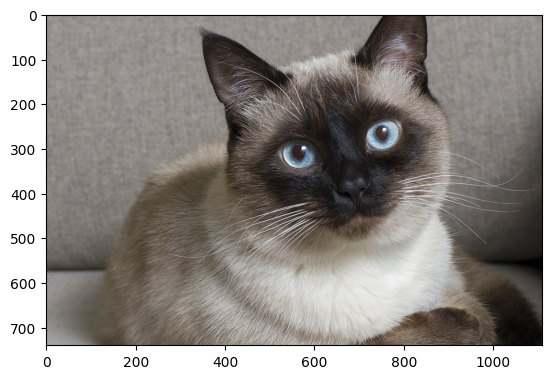

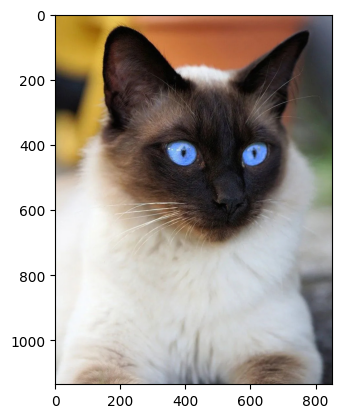

In [33]:
import cv2
l = "./drive/MyDrive/colab/data-t"
first = cv2.imread(f"{l}/first.jpeg")
plt.imshow(cv2.cvtColor(first, cv2.COLOR_BGR2RGB))
plt.show()


second = cv2.imread(f"{l}/second.jpeg")
plt.imshow(cv2.cvtColor(second, cv2.COLOR_BGR2RGB))
plt.show()

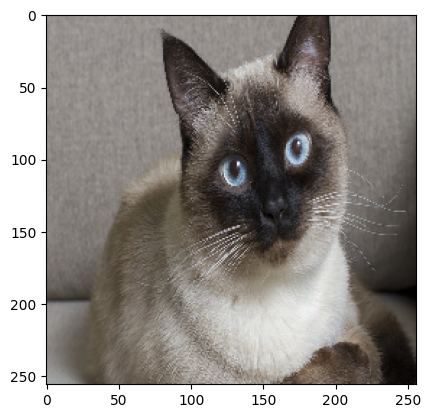

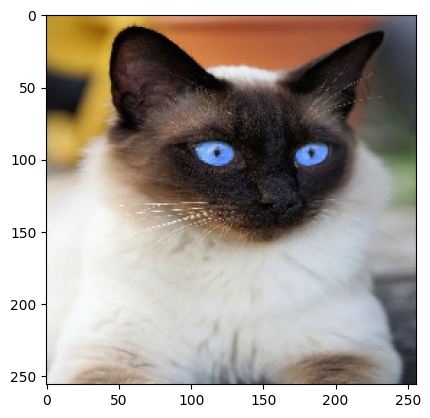

In [35]:
import cv2

first_resize = tf.image.resize(first, (256, 256))
second_resize = tf.image.resize(second, (256, 256))

first_rgb = tf.reverse(first_resize, axis=[-1])
second_rgb = tf.reverse(second_resize, axis=[-1])

plt.imshow(first_rgb.numpy().astype(int))
plt.show()
plt.imshow(second_rgb.numpy().astype(int))
plt.show()

In [37]:
def categorize(p):
  if p > 0.5:
    print(f"First!")
  else:
    print(f"Second!")

first_norm = first_resize / 255;
second_norm = second_resize / 255;
input = np.array([first_norm, second_norm])
predictions = model.predict(input)
for prediction in predictions:
  categorize(prediction)

1/1 [==============================] - 0s 50ms/step
Second!
Second!
